<a href="https://colab.research.google.com/github/pbxpanda/Heart/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install eli5

     |████████████████████████████████| 106 kB 4.4 MB/s 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


In [2]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/nauka_ML/heart.csv')
df.columns = ['wiek', 'płeć', 'Ból_klatki_piersiowej', 'Spoczynkowe_ciśnienie_krwi', 'Cholesterol', 'Poziom_cukru_we_krwi_na_czczo', 'Spoczynkowe_EKG', 'Max_tętno',
       'Dławica_piersiowa_wywołana_wysiłkiem', 'Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku', 'Nachylenie_odcinka_ST', 'Ilość_zabarwionych_naczyń', 'Talasemia', 'Zachorowanie']

In [3]:
df['płeć'][df['płeć'] == 0] = 'kobieta'
df['płeć'][df['płeć'] == 1] = 'mężczyzna'
df['Ból_klatki_piersiowej'][df['Ból_klatki_piersiowej'] == 1] = 'stabilna dławica piersiowa'
df['Ból_klatki_piersiowej'][df['Ból_klatki_piersiowej'] == 2] = 'niestabilna dusznica bolesna'
df['Ból_klatki_piersiowej'][df['Ból_klatki_piersiowej'] == 3] = 'nieanginalny ból'
df['Ból_klatki_piersiowej'][df['Ból_klatki_piersiowej'] == 4] = 'brak objawów'

df['Spoczynkowe_ciśnienie_krwi'][df['Spoczynkowe_ciśnienie_krwi'] == 0] = 'mniejsze 120mg/ml'
df['Spoczynkowe_ciśnienie_krwi'][df['Spoczynkowe_ciśnienie_krwi'] == 1] = 'większe 120mg/ml'

df['Spoczynkowe_EKG'][df['Spoczynkowe_EKG'] == 0] = 'w normie'
df['Spoczynkowe_EKG'][df['Spoczynkowe_EKG'] == 1] = 'nieprawidłowość fali ST-T'
df['Spoczynkowe_EKG'][df['Spoczynkowe_EKG'] == 2] = 'przerost lewej komory'

df['Dławica_piersiowa_wywołana_wysiłkiem'][df['Dławica_piersiowa_wywołana_wysiłkiem'] == 0] = 'nie'
df['Dławica_piersiowa_wywołana_wysiłkiem'][df['Dławica_piersiowa_wywołana_wysiłkiem'] == 1] = 'tak'

df['Nachylenie_odcinka_ST'][df['Nachylenie_odcinka_ST'] == 1] = 'rosnące'
df['Nachylenie_odcinka_ST'][df['Nachylenie_odcinka_ST'] == 2] = 'posiome'
df['Nachylenie_odcinka_ST'][df['Nachylenie_odcinka_ST'] == 3] = 'malejące'

df['Talasemia'][df['Talasemia'] == 1] = 'w normie'
df['Talasemia'][df['Talasemia'] == 2] = 'wada naprawiona'
df['Talasemia'][df['Talasemia'] == 3] = 'wada odwrócona'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [4]:
df.head()

,wiek,płeć,Ból_klatki_piersiowej,Spoczynkowe_ciśnienie_krwi,Cholesterol,Poziom_cukru_we_krwi_na_czczo,Spoczynkowe_EKG,Max_tętno,Dławica_piersiowa_wywołana_wysiłkiem,Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku,Nachylenie_odcinka_ST,Ilość_zabarwionych_naczyń,Talasemia,Zachorowanie
0,63,mężczyzna,nieanginalny ból,145,233,1,w normie,150,nie,2.3,0,0,w normie,1
1,37,mężczyzna,niestabilna dusznica bolesna,130,250,0,nieprawidłowość fali ST-T,187,nie,3.5,0,0,wada naprawiona,1
2,41,kobieta,stabilna dławica piersiowa,130,204,0,w normie,172,nie,1.4,posiome,0,wada naprawiona,1
3,56,mężczyzna,stabilna dławica piersiowa,120,236,0,nieprawidłowość fali ST-T,178,nie,0.8,posiome,0,wada naprawiona,1
4,57,kobieta,0,120,354,0,nieprawidłowość fali ST-T,163,tak,0.6,posiome,0,wada naprawiona,1


In [5]:
df.dtypes

wiek                                                         int64
płeć                                                        object
Ból_klatki_piersiowej                                       object
Spoczynkowe_ciśnienie_krwi                                   int64
Cholesterol                                                  int64
Poziom_cukru_we_krwi_na_czczo                                int64
Spoczynkowe_EKG                                             object
Max_tętno                                                    int64
Dławica_piersiowa_wywołana_wysiłkiem                        object
Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku    float64
Nachylenie_odcinka_ST                                       object
Ilość_zabarwionych_naczyń                                    int64
Talasemia                                                   object
Zachorowanie                                                 int64
dtype: object

In [6]:
df['Poziom_cukru_we_krwi_na_czczo'] = df['Poziom_cukru_we_krwi_na_czczo'].astype('object')
df.dtypes

wiek                                                         int64
płeć                                                        object
Ból_klatki_piersiowej                                       object
Spoczynkowe_ciśnienie_krwi                                   int64
Cholesterol                                                  int64
Poziom_cukru_we_krwi_na_czczo                               object
Spoczynkowe_EKG                                             object
Max_tętno                                                    int64
Dławica_piersiowa_wywołana_wysiłkiem                        object
Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku    float64
Nachylenie_odcinka_ST                                       object
Ilość_zabarwionych_naczyń                                    int64
Talasemia                                                   object
Zachorowanie                                                 int64
dtype: object

In [7]:
df.head()

,wiek,płeć,Ból_klatki_piersiowej,Spoczynkowe_ciśnienie_krwi,Cholesterol,Poziom_cukru_we_krwi_na_czczo,Spoczynkowe_EKG,Max_tętno,Dławica_piersiowa_wywołana_wysiłkiem,Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku,Nachylenie_odcinka_ST,Ilość_zabarwionych_naczyń,Talasemia,Zachorowanie
0,63,mężczyzna,nieanginalny ból,145,233,1,w normie,150,nie,2.3,0,0,w normie,1
1,37,mężczyzna,niestabilna dusznica bolesna,130,250,0,nieprawidłowość fali ST-T,187,nie,3.5,0,0,wada naprawiona,1
2,41,kobieta,stabilna dławica piersiowa,130,204,0,w normie,172,nie,1.4,posiome,0,wada naprawiona,1
3,56,mężczyzna,stabilna dławica piersiowa,120,236,0,nieprawidłowość fali ST-T,178,nie,0.8,posiome,0,wada naprawiona,1
4,57,kobieta,0,120,354,0,nieprawidłowość fali ST-T,163,tak,0.6,posiome,0,wada naprawiona,1


In [8]:
df.isnull().sum()

wiek                                                       0
płeć                                                       0
Ból_klatki_piersiowej                                      0
Spoczynkowe_ciśnienie_krwi                                 0
Cholesterol                                                0
Poziom_cukru_we_krwi_na_czczo                              0
Spoczynkowe_EKG                                            0
Max_tętno                                                  0
Dławica_piersiowa_wywołana_wysiłkiem                       0
Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku    0
Nachylenie_odcinka_ST                                      0
Ilość_zabarwionych_naczyń                                  0
Talasemia                                                  0
Zachorowanie                                               0
dtype: int64

In [11]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,wiek,Spoczynkowe_ciśnienie_krwi,Cholesterol,Max_tętno,Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku,Ilość_zabarwionych_naczyń,Zachorowanie,płeć_mężczyzna,Ból_klatki_piersiowej_nieanginalny ból,Ból_klatki_piersiowej_niestabilna dusznica bolesna,Ból_klatki_piersiowej_stabilna dławica piersiowa,Poziom_cukru_we_krwi_na_czczo_1,Spoczynkowe_EKG_przerost lewej komory,Spoczynkowe_EKG_w normie,Dławica_piersiowa_wywołana_wysiłkiem_tak,Nachylenie_odcinka_ST_posiome,Nachylenie_odcinka_ST_rosnące,Talasemia_w normie,Talasemia_wada naprawiona,Talasemia_wada odwrócona
0,63,145,233,150,2.3,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0


In [12]:
X=df.drop(['Zachorowanie'],axis=1)
y=df.Zachorowanie.values
features=X.columns.to_list()
print(features)
len(features)

['wiek', 'Spoczynkowe_ciśnienie_krwi', 'Cholesterol', 'Max_tętno', 'Obnienie_ST_wywołane_wysiłkiem_w_stosunku_do_odpoczynku', 'Ilość_zabarwionych_naczyń', 'płeć_mężczyzna', 'Ból_klatki_piersiowej_nieanginalny ból', 'Ból_klatki_piersiowej_niestabilna dusznica bolesna', 'Ból_klatki_piersiowej_stabilna dławica piersiowa', 'Poziom_cukru_we_krwi_na_czczo_1', 'Spoczynkowe_EKG_przerost lewej komory', 'Spoczynkowe_EKG_w normie', 'Dławica_piersiowa_wywołana_wysiłkiem_tak', 'Nachylenie_odcinka_ST_posiome', 'Nachylenie_odcinka_ST_rosnące', 'Talasemia_w normie', 'Talasemia_wada naprawiona', 'Talasemia_wada odwrócona']


19

In [13]:
validation_size=0.20
seed=7
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=validation_size, random_state=seed)
sc_X= ss()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
#LogisticRegression
lr=LogisticRegression(random_state=seed)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
print(accuracy_score(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
lr_acc=accuracy_score(y_test, lr_predictions)

0.7704918032786885
[[20 10]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [15]:
#SVM classifier
svc=SVC(kernel='linear',random_state=seed)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
print(accuracy_score(y_test, svc_predictions))
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))
svc_acc=accuracy_score(y_test, svc_predictions)

0.7540983606557377
[[20 10]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [16]:
#LinearDiscriminantAnalysis
lda=LDA()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
print(accuracy_score(y_test, lda_predictions))
print(confusion_matrix(y_test, lda_predictions))
print(classification_report(y_test, lda_predictions))
lda_acc=accuracy_score(y_test, lda_predictions)

0.7540983606557377
[[19 11]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.71      0.87      0.78        31

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



In [17]:
#DecisionTreeClassifier
cart=DecisionTreeClassifier()
cart.fit(X_train, y_train)
cart_predictions = cart.predict(X_test)
print(accuracy_score(y_test, cart_predictions))
print(confusion_matrix(y_test, cart_predictions))
print(classification_report(y_test, cart_predictions))
cart_acc=accuracy_score(y_test, cart_predictions)

0.6557377049180327
[[15 15]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        30
           1       0.62      0.81      0.70        31

    accuracy                           0.66        61
   macro avg       0.67      0.65      0.65        61
weighted avg       0.67      0.66      0.65        61



In [18]:
#NB
nb=GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
print(accuracy_score(y_test, nb_predictions))
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
nb_acc=accuracy_score(y_test, nb_predictions)

0.8032786885245902
[[22  8]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [19]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
print(accuracy_score(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))
xbg_acc=accuracy_score(y_test, xgb_predictions)

0.7704918032786885
[[21  9]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.84      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [20]:
#RandomForestClassifier
RFC = RandomForestClassifier(max_depth=5)
RFC.fit(X_train, y_train)
RFC_predictions = RFC.predict(X_test)
print(accuracy_score(y_test, RFC_predictions))
print(confusion_matrix(y_test, RFC_predictions))
print(classification_report(y_test, RFC_predictions))
RFC_acc=accuracy_score(y_test, RFC_predictions)

0.7540983606557377
[[19 11]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.71      0.87      0.78        31

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



In [21]:
#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(accuracy_score(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))
knn_acc=accuracy_score(y_test, knn_predictions)

0.7377049180327869
[[23  7]
 [ 9 22]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.76      0.71      0.73        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



Text(0.5, 1.0, 'Trafność modeli')

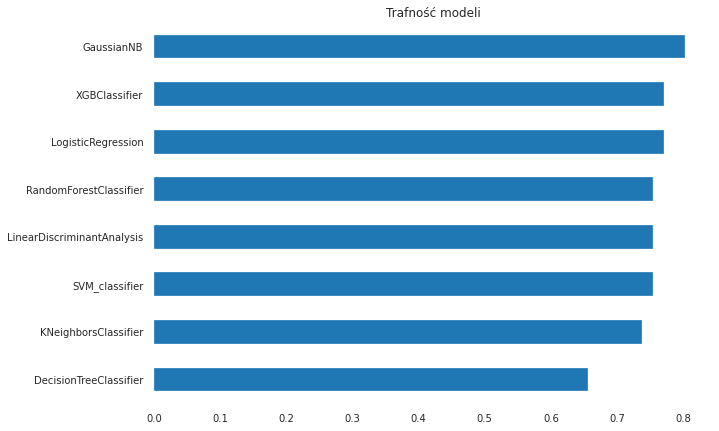

In [22]:
model_accuracy = pd.Series(data=[lr_acc,svc_acc,lda_acc,cart_acc,nb_acc,xbg_acc,RFC_acc,knn_acc], 
                index=['LogisticRegression','SVM_classifier','LinearDiscriminantAnalysis','DecisionTreeClassifier',
                                      'GaussianNB','XGBClassifier','RandomForestClassifier','KNeighborsClassifier'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Trafność modeli')

In [23]:
perm=PermutationImportance(nb,random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names=features)

Weight,Feature
0.0361 ± 0.0382,Ból_klatki_piersiowej_stabilna dławica piersiowa
0.0328 ± 0.0656,Ból_klatki_piersiowej_niestabilna dusznica bolesna
0.0197 ± 0.0245,Talasemia_wada naprawiona
0.0197 ± 0.0245,Nachylenie_odcinka_ST_posiome
0.0164 ± 0.0207,Ilość_zabarwionych_naczyń
0.0131 ± 0.0435,Max_tętno
0.0131 ± 0.0382,Talasemia_wada odwrócona
0.0131 ± 0.0382,Dławica_piersiowa_wywołana_wysiłkiem_tak
0.0131 ± 0.0131,Talasemia_w normie
0.0098 ± 0.0161,Poziom_cukru_we_krwi_na_czczo_1
